<a href="https://colab.research.google.com/github/fhfmendes04/Awesome-LLM/blob/main/Algoritmo_Gen%C3%A9tico_oito_rainhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import random
import math
import sys

from copy import deepcopy
import matplotlib.pyplot as plt

random.seed(42)

Fitness

In [3]:
def fitness(tabuleiro, individuo):
  custo = 0
  # Repetido mesma linha vertical e horizontal
  for i in range(tabuleiro):
    conta = 0
    for j in range(tabuleiro):
      if individuo[j][i] == 1: # vertical
        conta +=1
    if conta > 1:
      custo += conta
    conta = 0
    for j in range(tabuleiro): # horizontal
      if individuo[i][j] == 1:
        conta +=1
    if conta > 1:
      custo += conta
  #print('Vertical e Hori',custo)
  #Diagonal Direita
  for j in range(0,tabuleiro-1):
    conta = 0
    #print('->',0,j)
    if individuo[0][j] == 1:
      conta += 1
    for i in range(1,tabuleiro):
      if (i+j) > 7:
        continue
      #print('-',i,i+j)
      if individuo[i][i+j] == 1:
        conta +=1
    if conta > 1:
      #print('DD',conta)
      custo += conta
  #print('Vertical, Hori e D',custo)
  #Diagonal Esquerda
  for i in range(1,tabuleiro-1):
    conta = 0
    #print('->',i,0)
    if individuo[i][0] == 1:
      conta += 1
    for j in range(i+1,tabuleiro):
      #print('-',j,j-i)
      if individuo[j][j-i] == 1:
        conta +=1
    if conta > 1:
      #print('DE',conta)
      custo += conta
  #Diagonal Inversa Esquerda
  for i in range((tabuleiro - 1),0,-1):
    conta = 0
    #print('->',0,i)
    if individuo[0][i] == 1:
      conta += 1
    for j in range(i-1,-1,-1):
      #print('-',i-j, j)
      if individuo[i-j][j] == 1:
        conta +=1
    if conta > 1:
      #print('DIE',conta)
      custo += conta
  #Diagonal Inversa Direita
  for i in range(1, tabuleiro-1):
    conta = 0
    #print('->',i,7)
    if individuo[i][7] == 1:
      conta += 1
    for j in range(i+1,tabuleiro):
      #print('-',j, (7+i-j))
      if individuo[j][7+i-j] == 1:
        conta +=1
    if conta > 1:
      #print('DID',conta)
      custo += conta

  #print('Vertical, Hori e D',custo)
  return custo

Mutação

In [4]:
def mutacao(individuo, probabilidade, tabuleiro):
  if random.random() <= probabilidade:
    linha = random.randint(0, tabuleiro-1)
    gene = random.randint(0, tabuleiro-1)
    individuo_temp = deepcopy(individuo[linha])
    posicao = individuo_temp.index(1) # Descobre a posisão do valor = 1
    individuo_temp[posicao] = 0 # muda para 0
    individuo_temp[gene] = 1
    individuo[linha]= individuo_temp
  return individuo

Crossover

In [8]:
def crossover(individuo1, individuo2, tabuleiro):

  posicao = random.randint(0, tabuleiro-2) # Até a posicao 6

  contador = 0

  filho1 = deepcopy(individuo1)
  filho2 = deepcopy(individuo2)

  while contador <= posicao:
    filho1[contador] = deepcopy(individuo2[contador])
    filho2[contador] = deepcopy(individuo1[contador])
    contador +=1

  return filho1, filho2

# AG - Elitista

In [16]:
def algoritmo_genetico(tamanho_populacao = 1000,
                       numero_geracoes = 100, probabilidade_mutacao = 0.5,
                       tabuleiro=8, resultados = 3):
  # Cria a populacão
  populacao = []
  lista_campeao = []
  while len(populacao) < tamanho_populacao:
    individuo = []
    for i in range(tabuleiro):
      posicao = random.randint(0, tabuleiro-1)
      pop = [1 if x == posicao else 0 for x in range(0, tabuleiro)]
      individuo.append(pop)

    populacao.append(individuo)

  numero_elitismo = tamanho_populacao

  # Cálcula o custo da população com o fitness()
  custos = [[fitness(tabuleiro, individuo), individuo] for individuo in populacao]
  melhores = [custo for (custo, individuo) in custos] # Usado no Gráfico
  custos.sort()
  individuos_ordenados = [individuo for (custo, individuo) in custos]
  #Escolha elitista
  populacao = deepcopy(individuos_ordenados[0:numero_elitismo])
  custo_melhor = int(fitness(tabuleiro, populacao[0]))

  #Gráfico
  print('Melhor Fitness:', fitness(tabuleiro, individuos_ordenados[0]))
  print('Pior Fitness:', fitness(tabuleiro, individuos_ordenados[-1]))
  plt.plot(melhores,'o')
  plt.title('Fitness x População')
  plt.xlabel('Indivíduo')
  plt.ylabel('Valor de fitness')
  plt.axhline(y=custo_melhor, color="black", linestyle="--")
  plt.show()

  #Faz o crossover e mutação da população escolhida.
  for i in range(1, numero_geracoes):
    numero_elitismo = int(tamanho_populacao * (1-(i /numero_geracoes))) #ELITISMO
    while len(populacao) < tamanho_populacao:
      i1 = random.randint(0, numero_elitismo)
      i2 = random.randint(0, numero_elitismo)
      while i1 == i2:
        i1 = random.randint(0, numero_elitismo)
      novo_individuo1, novo_individuo2 = list(crossover(individuos_ordenados[i1], individuos_ordenados[i2], tabuleiro))
      mutacao_novo_individuo1 = mutacao(novo_individuo1, probabilidade_mutacao, tabuleiro)
      mutacao_novo_individuo2 = mutacao(novo_individuo2, probabilidade_mutacao, tabuleiro)
      populacao.append(mutacao_novo_individuo1)
      if len(populacao) < (tamanho_populacao - 1):
        populacao.append(mutacao_novo_individuo2)

    #Escolha elitista
    custos = [[fitness(tabuleiro, individuo), individuo] for individuo in populacao]
    melhores = [custo for (custo, individuo) in custos] # Usado no Gráfico
    custos.sort()
    individuos_ordenados = [individuo for (custo, individuo) in custos]
    populacao =  deepcopy(individuos_ordenados[0:numero_elitismo])

    # Cria lista com os resultados.
    individuos_custos_zero = [individuo for (custo, individuo) in custos if custo==0] # Seleciona os individuos com custos = Zero
    for p in individuos_custos_zero:  #populacao[:20]:
      custo_p = int(fitness(tabuleiro, p))
      if custo_p == 0:
        if len(lista_campeao) == 0:
          lista_campeao.append(deepcopy(p))
          custo_melhor = 0
        else:
          if len(lista_campeao) == resultados:
            return lista_campeao
          else:
            flag = True
            for l in lista_campeao:
              conta = 0
              for t in range(0, tabuleiro):
                cromo_l = ''.join(str(e) for e in l[t])
                cromo_p = ''.join(str(e) for e in p[t])
                if cromo_l == cromo_p:
                  conta +=1
              if conta == 8:
                flag = False
            if flag:
              lista_campeao.append(deepcopy(p))
              custo_melhor = 0


    #Gráfico
    print('Geração:', i+1, 'Melhor Fitness:', fitness(tabuleiro, individuos_ordenados[0]),
          'Pior Fitness:', fitness(tabuleiro,  individuos_ordenados[-1]),'Resultado(s):', len(lista_campeao))
    plt.plot(melhores,'o')
    plt.title('Fitness x População')
    plt.xlabel('Indivíduo')
    plt.ylabel('Valor de fitness')
    plt.axhline(y=fitness(tabuleiro, individuos_ordenados[0]), color="black", linestyle="--")
    plt.axvline(x=numero_elitismo, color="black", linestyle="-")
    plt.show()

  return lista_campeao #campeao

Melhor Fitness: 2
Pior Fitness: 20


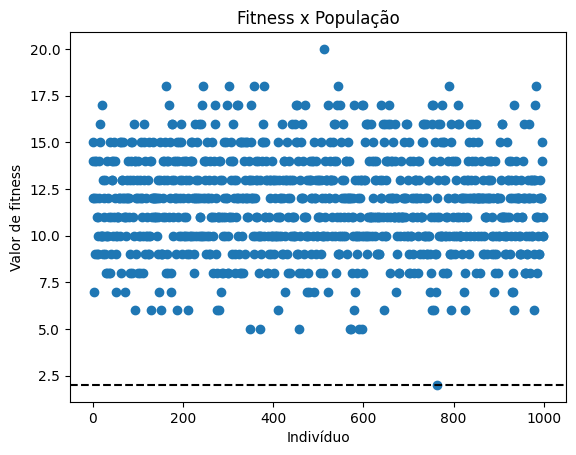

Geração: 2 Melhor Fitness: 2 Pior Fitness: 20 Resultado(s): 0


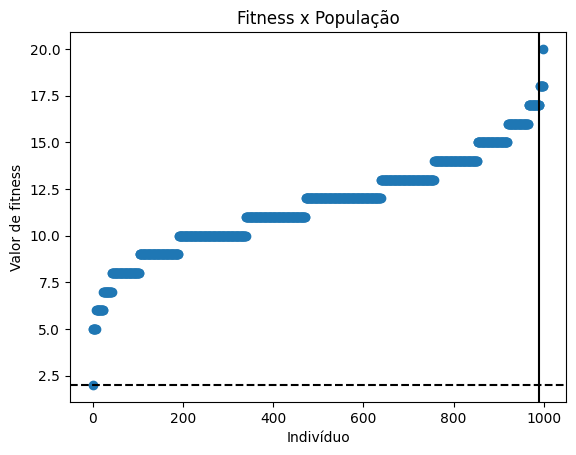

Geração: 3 Melhor Fitness: 2 Pior Fitness: 17 Resultado(s): 0


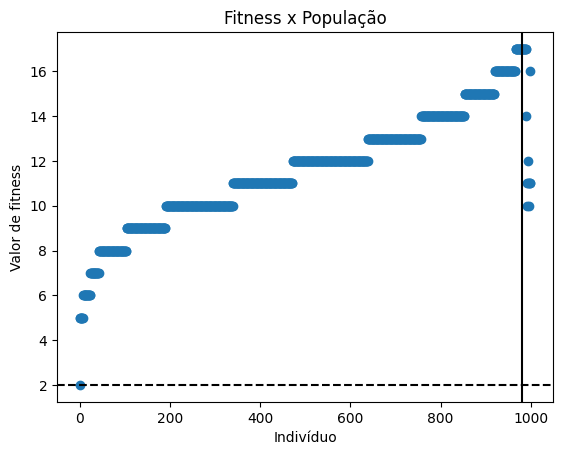

Geração: 4 Melhor Fitness: 2 Pior Fitness: 17 Resultado(s): 0


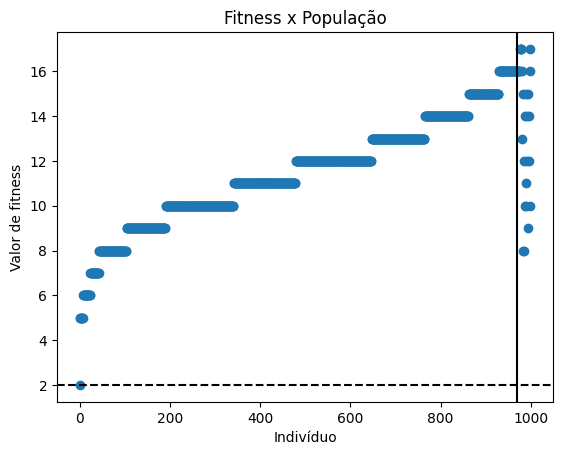

Geração: 5 Melhor Fitness: 2 Pior Fitness: 16 Resultado(s): 0


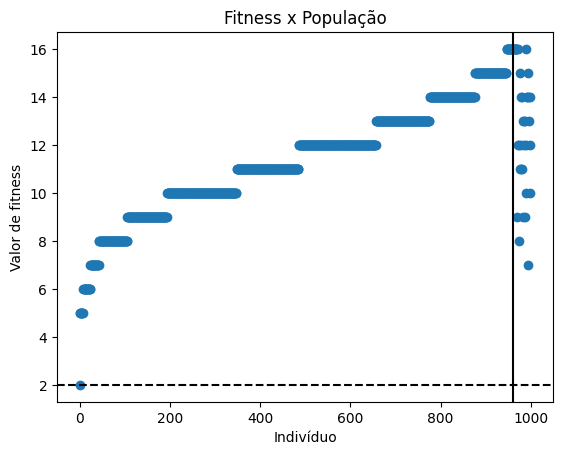

Geração: 6 Melhor Fitness: 2 Pior Fitness: 15 Resultado(s): 0


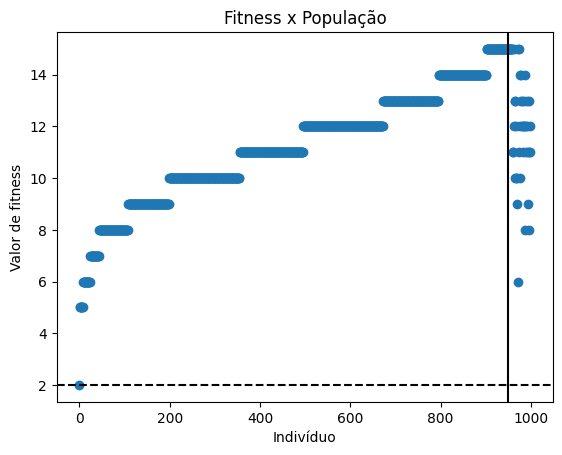

Geração: 7 Melhor Fitness: 2 Pior Fitness: 16 Resultado(s): 0


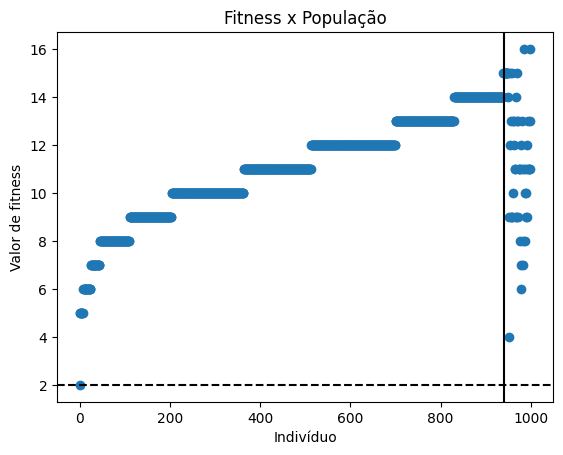

Geração: 8 Melhor Fitness: 2 Pior Fitness: 17 Resultado(s): 0


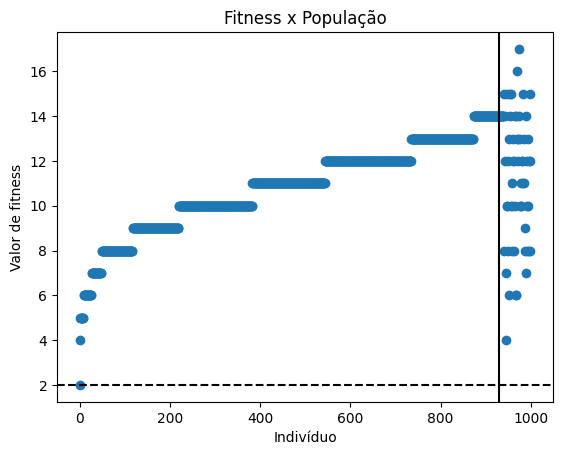

Geração: 9 Melhor Fitness: 2 Pior Fitness: 17 Resultado(s): 0


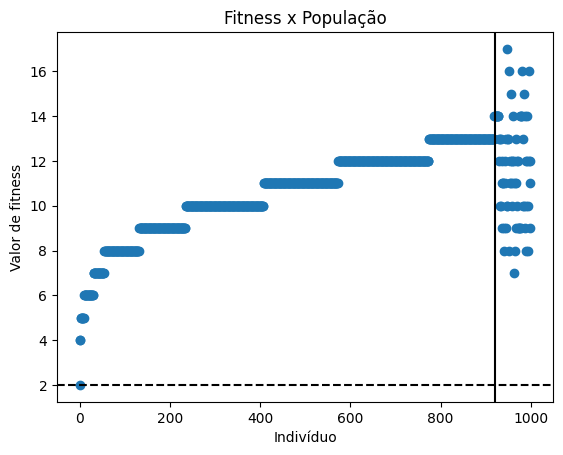

Geração: 10 Melhor Fitness: 2 Pior Fitness: 17 Resultado(s): 0


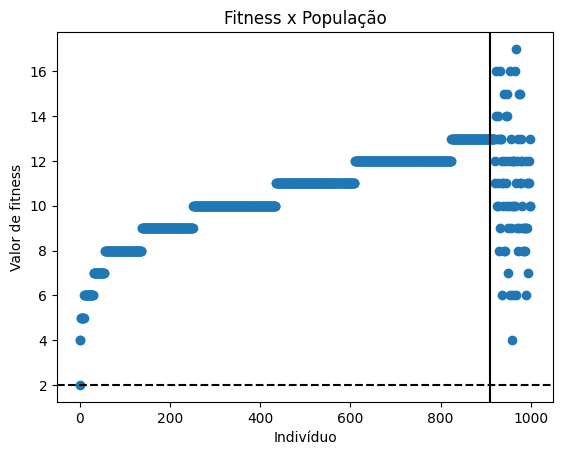

Geração: 11 Melhor Fitness: 2 Pior Fitness: 21 Resultado(s): 0


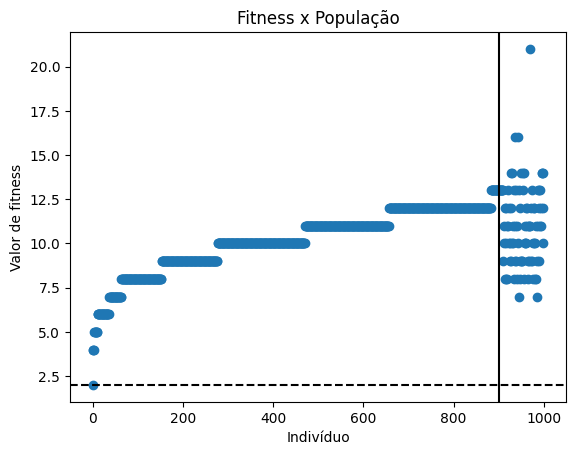

Geração: 12 Melhor Fitness: 2 Pior Fitness: 17 Resultado(s): 0


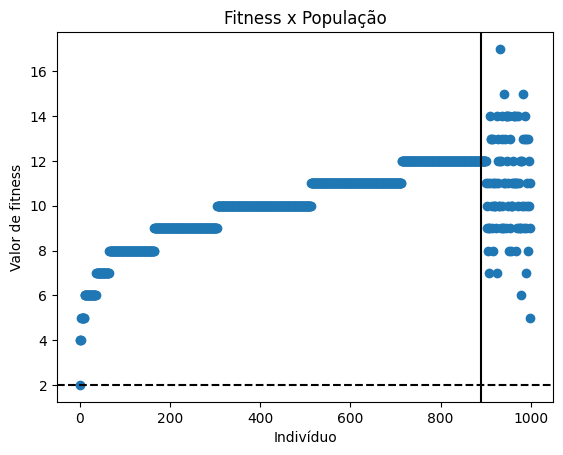

Geração: 13 Melhor Fitness: 2 Pior Fitness: 20 Resultado(s): 0


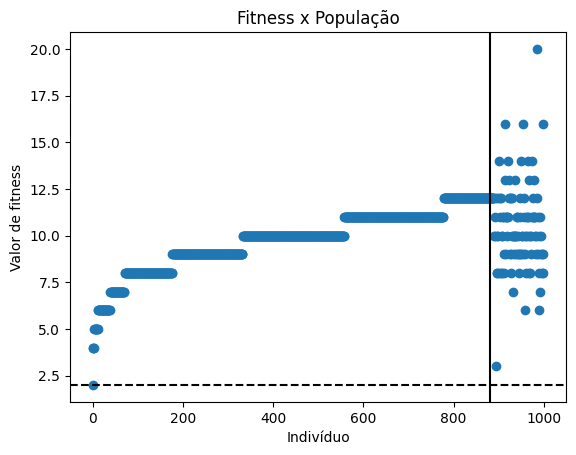

Geração: 14 Melhor Fitness: 2 Pior Fitness: 15 Resultado(s): 0


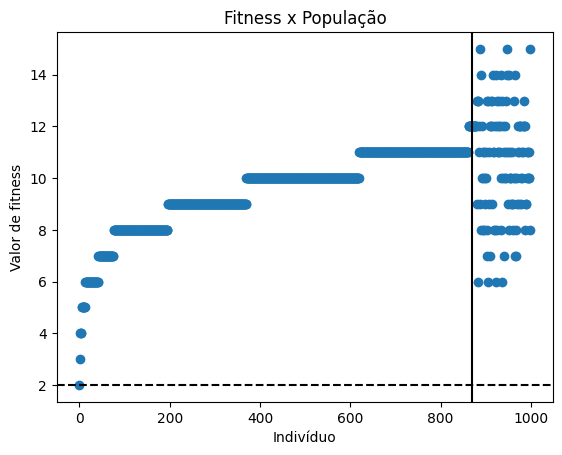

Geração: 15 Melhor Fitness: 2 Pior Fitness: 17 Resultado(s): 0


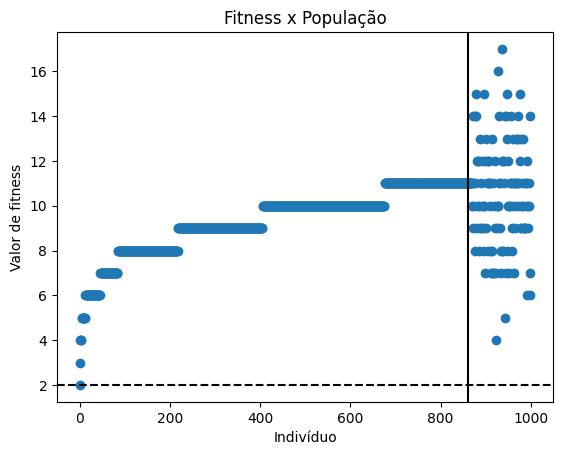

Geração: 16 Melhor Fitness: 2 Pior Fitness: 16 Resultado(s): 0


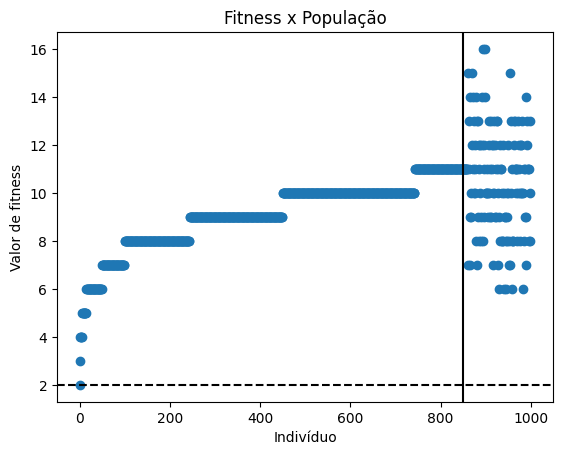

Geração: 17 Melhor Fitness: 2 Pior Fitness: 17 Resultado(s): 0


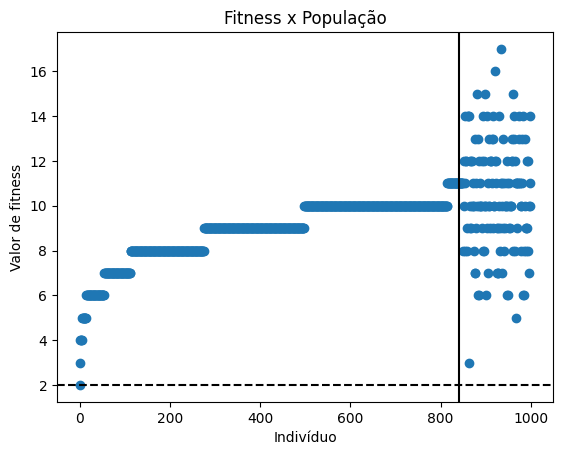

Geração: 18 Melhor Fitness: 2 Pior Fitness: 17 Resultado(s): 0


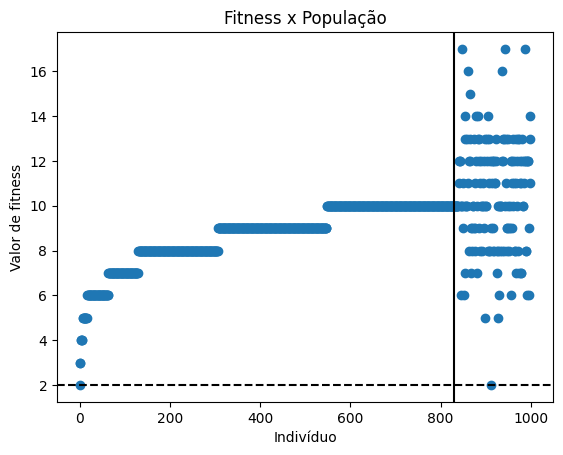

Geração: 19 Melhor Fitness: 2 Pior Fitness: 16 Resultado(s): 0


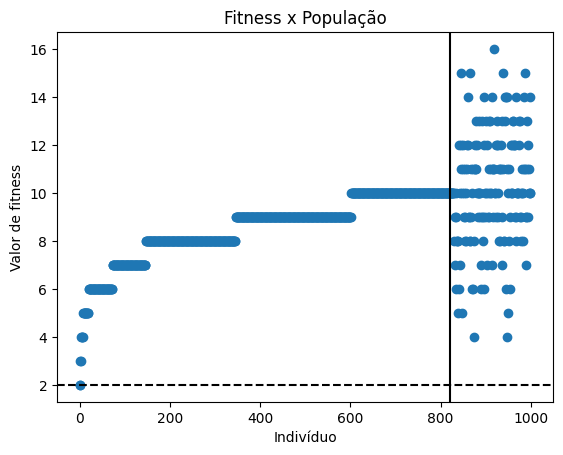

Geração: 20 Melhor Fitness: 2 Pior Fitness: 16 Resultado(s): 0


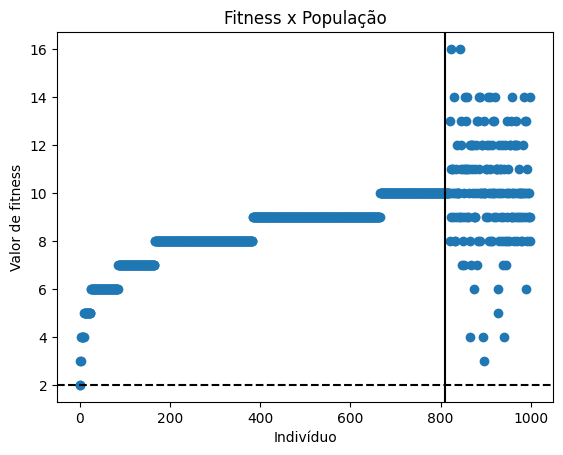

Geração: 21 Melhor Fitness: 2 Pior Fitness: 16 Resultado(s): 0


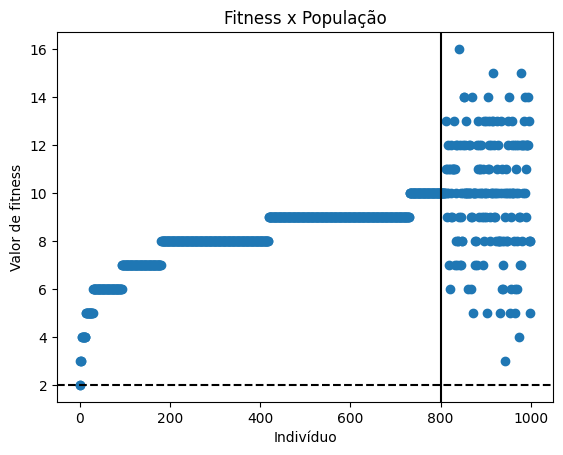

Geração: 22 Melhor Fitness: 2 Pior Fitness: 16 Resultado(s): 0


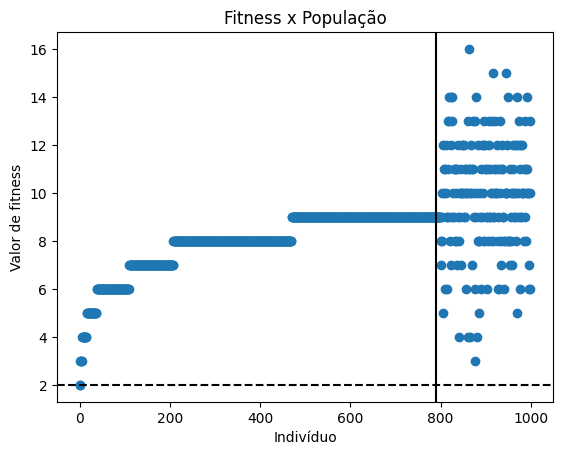

Geração: 23 Melhor Fitness: 2 Pior Fitness: 15 Resultado(s): 0


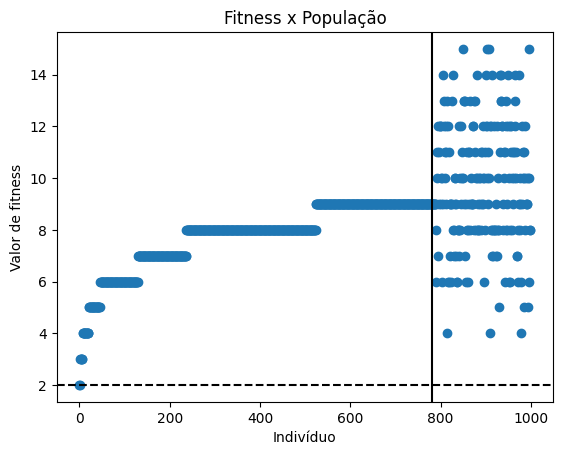

Geração: 24 Melhor Fitness: 2 Pior Fitness: 17 Resultado(s): 0


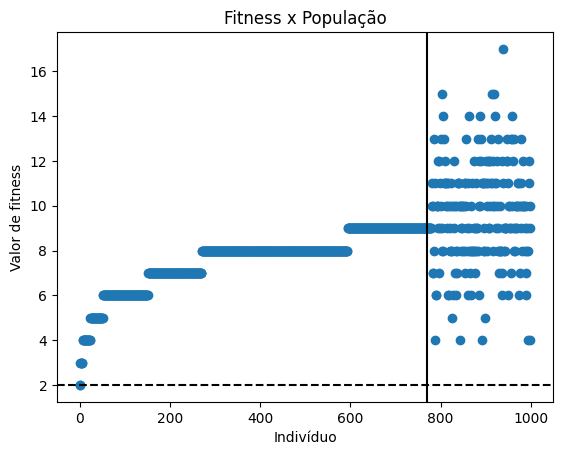

Geração: 25 Melhor Fitness: 2 Pior Fitness: 15 Resultado(s): 0


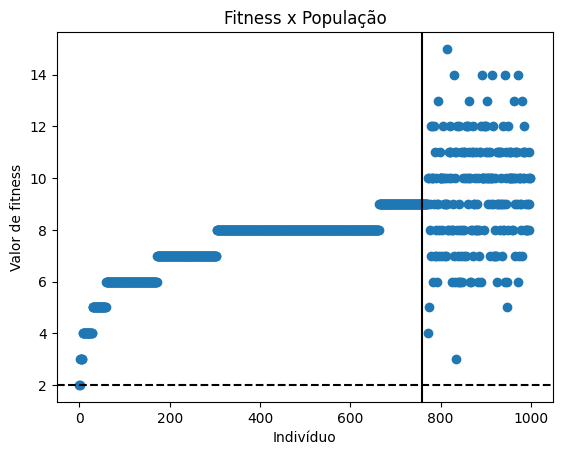

Geração: 26 Melhor Fitness: 2 Pior Fitness: 16 Resultado(s): 0


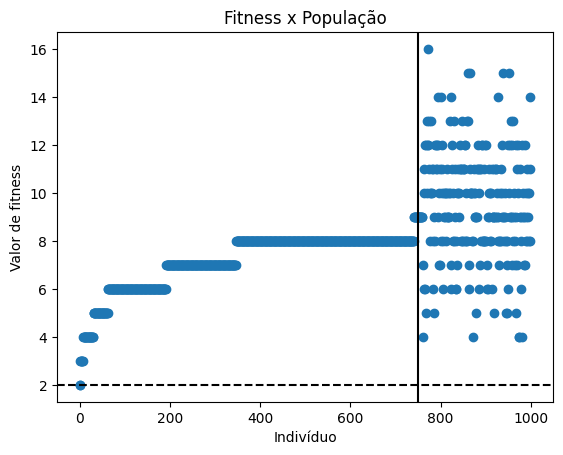

Geração: 27 Melhor Fitness: 2 Pior Fitness: 14 Resultado(s): 0


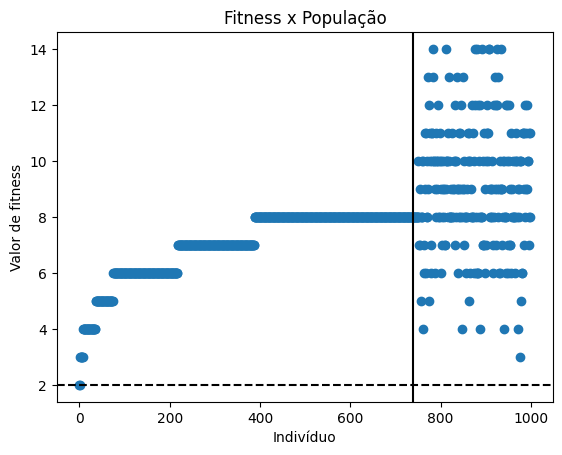

Geração: 28 Melhor Fitness: 2 Pior Fitness: 16 Resultado(s): 0


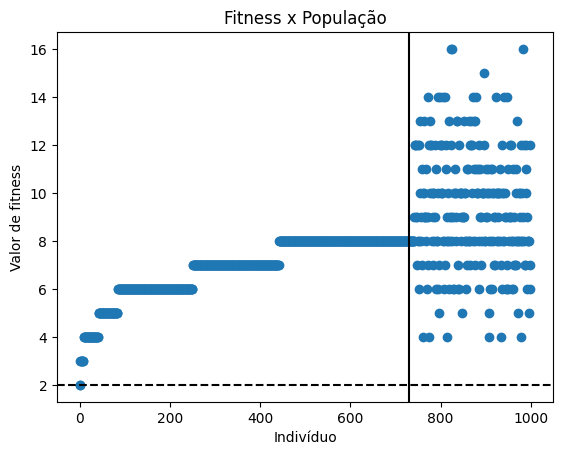

Geração: 29 Melhor Fitness: 2 Pior Fitness: 15 Resultado(s): 0


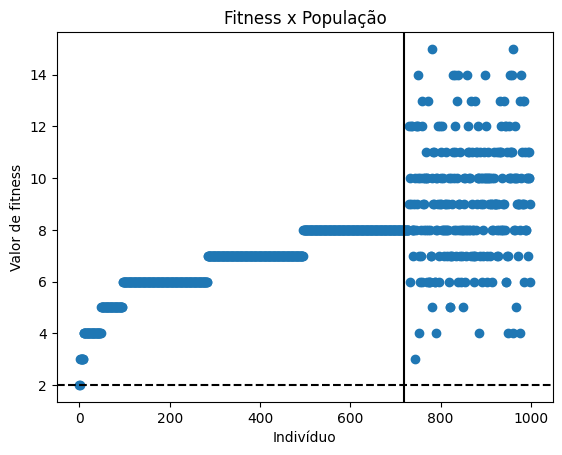

Geração: 30 Melhor Fitness: 2 Pior Fitness: 16 Resultado(s): 0


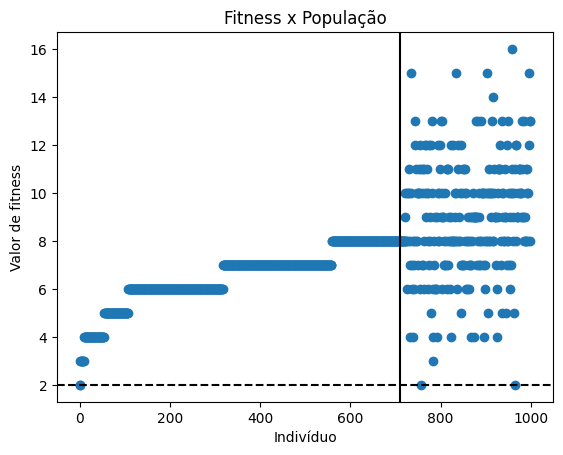

Geração: 31 Melhor Fitness: 2 Pior Fitness: 16 Resultado(s): 0


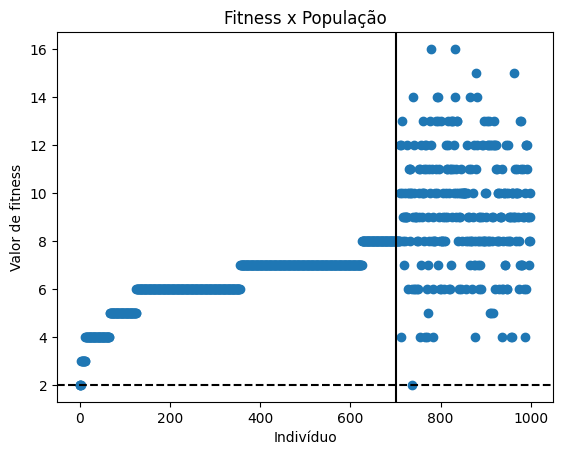

Geração: 32 Melhor Fitness: 2 Pior Fitness: 16 Resultado(s): 0


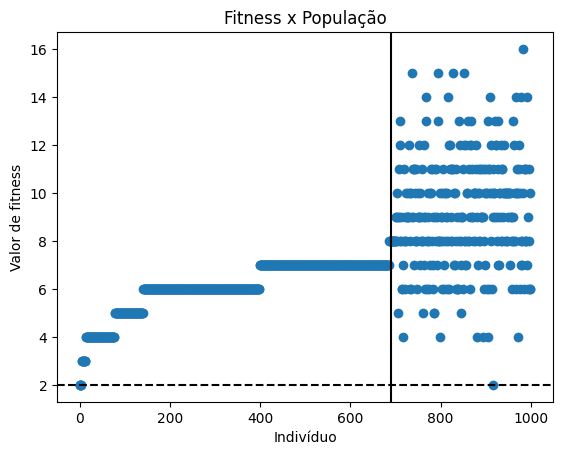

Geração: 33 Melhor Fitness: 2 Pior Fitness: 15 Resultado(s): 0


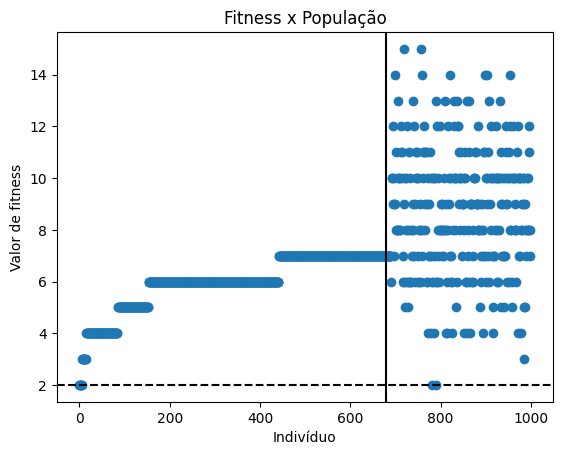

Geração: 34 Melhor Fitness: 2 Pior Fitness: 14 Resultado(s): 0


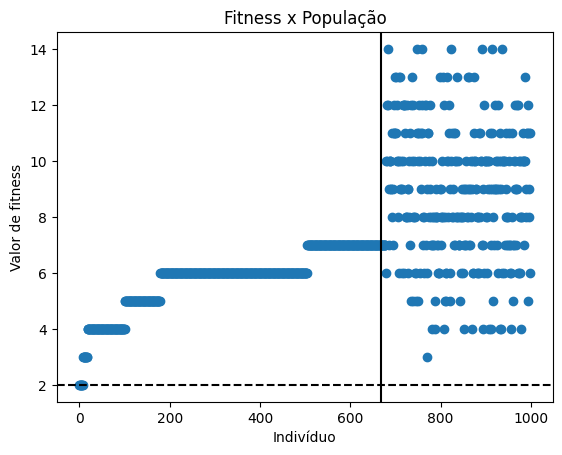

Geração: 35 Melhor Fitness: 2 Pior Fitness: 15 Resultado(s): 0


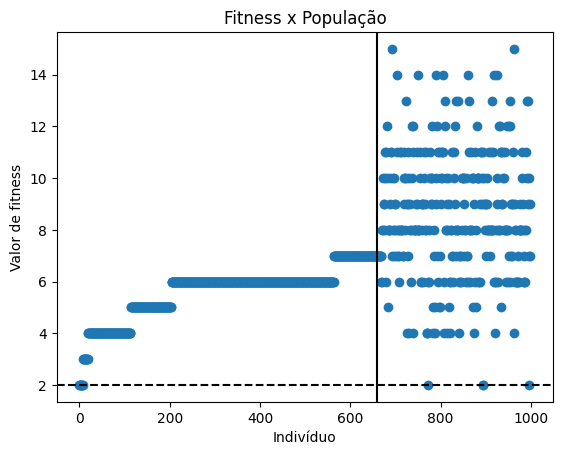

Geração: 36 Melhor Fitness: 2 Pior Fitness: 15 Resultado(s): 0


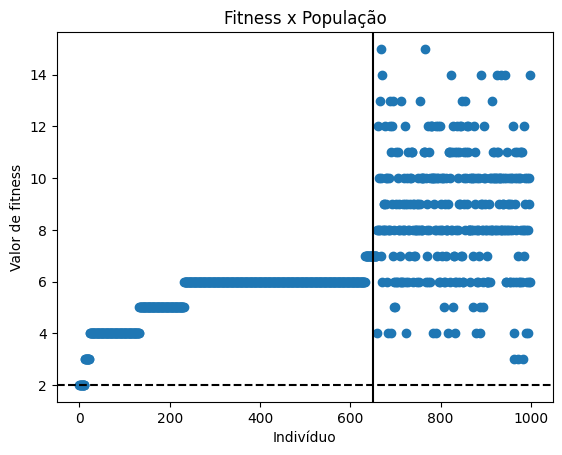

Geração: 37 Melhor Fitness: 2 Pior Fitness: 17 Resultado(s): 0


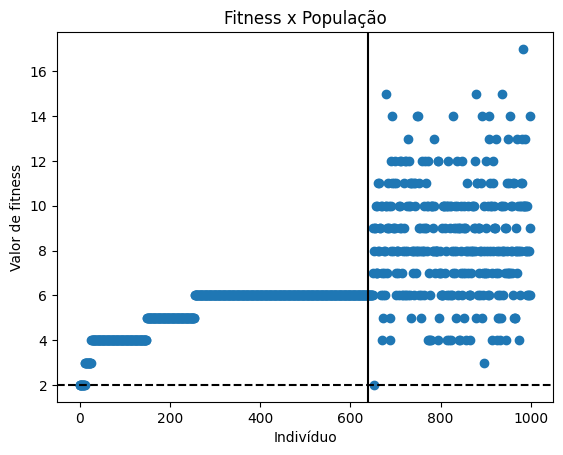

Geração: 38 Melhor Fitness: 2 Pior Fitness: 15 Resultado(s): 0


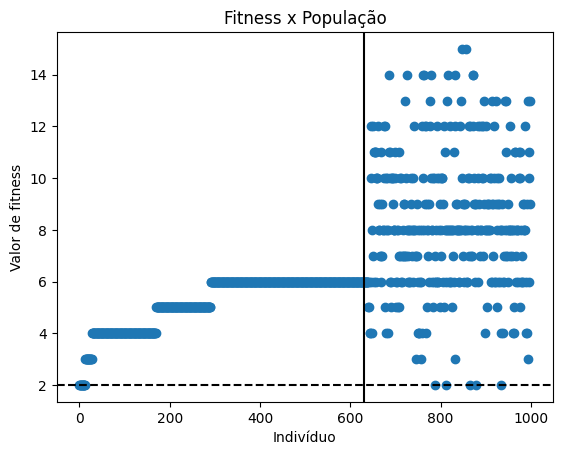

Geração: 39 Melhor Fitness: 0 Pior Fitness: 16 Resultado(s): 1


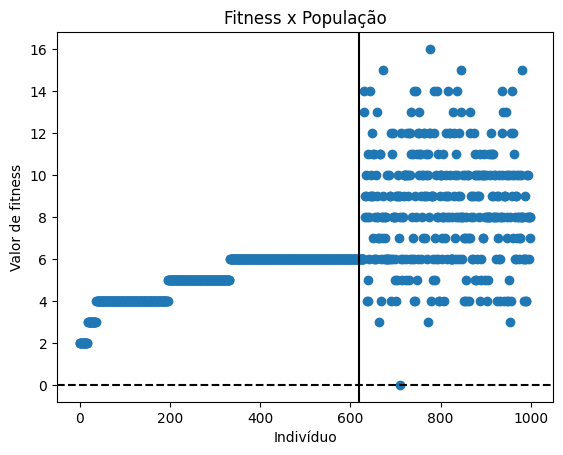

Geração: 40 Melhor Fitness: 0 Pior Fitness: 17 Resultado(s): 1


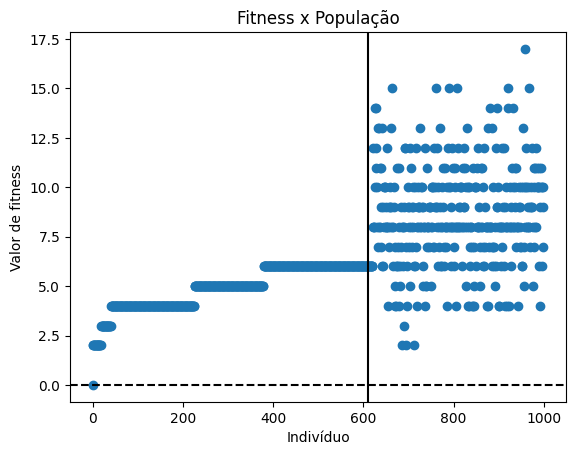

Geração: 41 Melhor Fitness: 0 Pior Fitness: 15 Resultado(s): 1


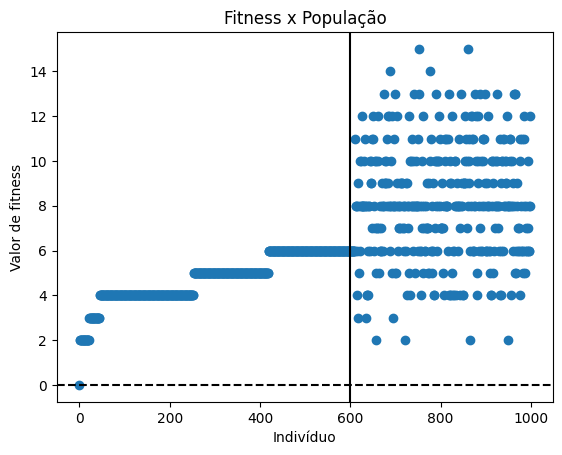

Geração: 42 Melhor Fitness: 0 Pior Fitness: 15 Resultado(s): 1


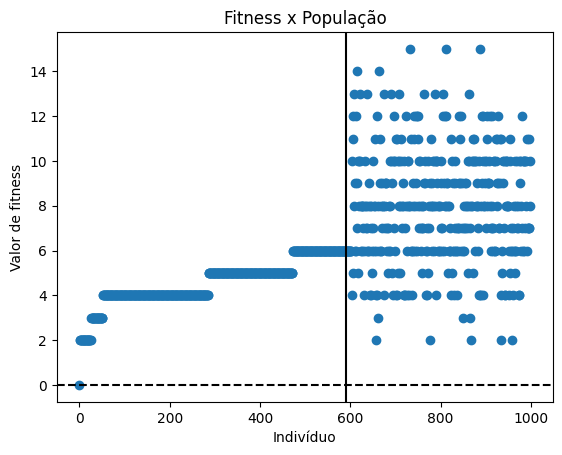

Geração: 43 Melhor Fitness: 0 Pior Fitness: 15 Resultado(s): 1


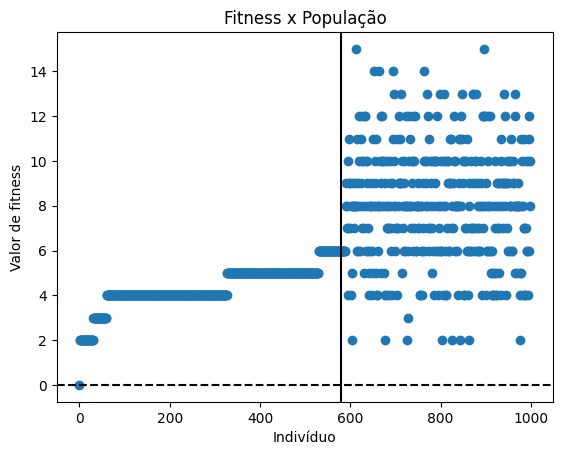

Geração: 44 Melhor Fitness: 0 Pior Fitness: 17 Resultado(s): 2


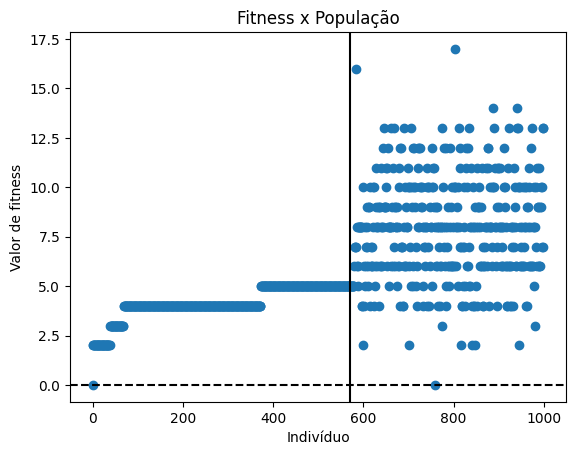

Geração: 45 Melhor Fitness: 0 Pior Fitness: 15 Resultado(s): 2


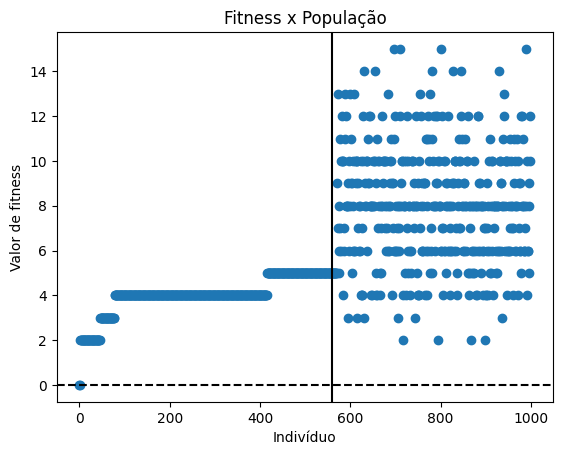

Geração: 46 Melhor Fitness: 0 Pior Fitness: 16 Resultado(s): 3


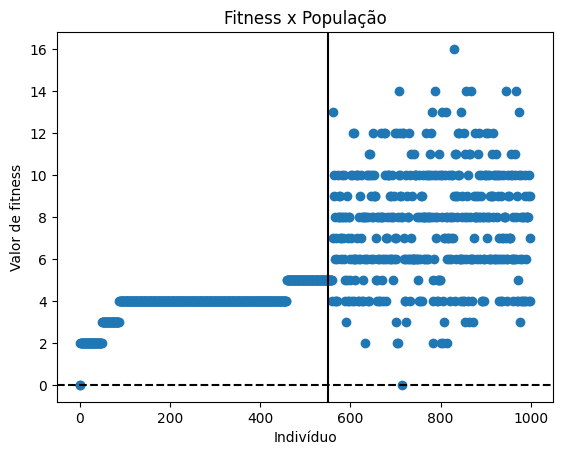

Quantos resultados: 3
Fitness: 0
[[0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1]]
_____________
Fitness: 0
[[0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0]]
_____________
Fitness: 0
[[0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0]]
_____________


In [17]:
tabuleiro = 8
solucao = algoritmo_genetico(numero_geracoes = 100, tamanho_populacao=1000,
                            probabilidade_mutacao = 0.5,
                            tabuleiro=tabuleiro, resultados = 3)

print('Quantos resultados:', len(solucao))
for s in solucao:
  print('Fitness:', fitness(tabuleiro, s))
  print(s)
  print('_____________')

# AG - Básico

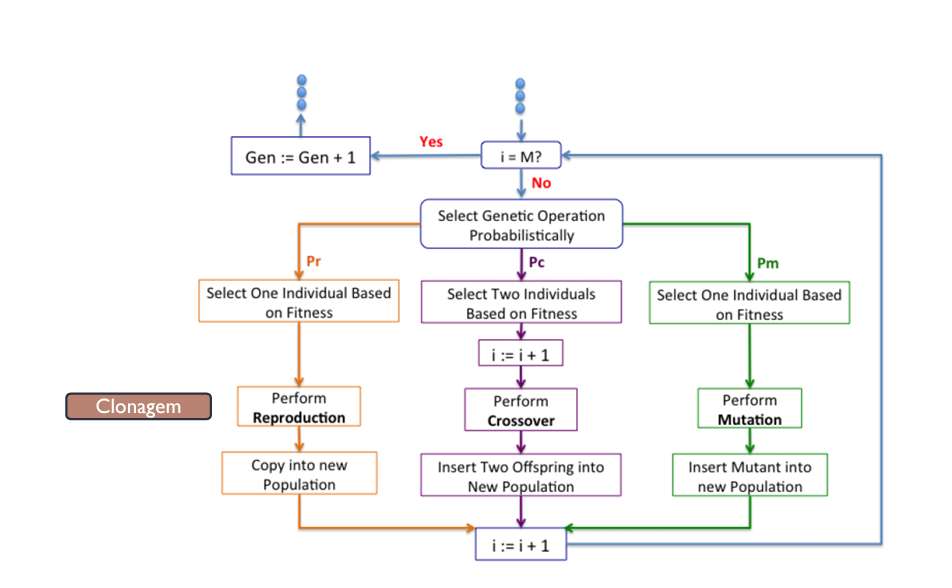

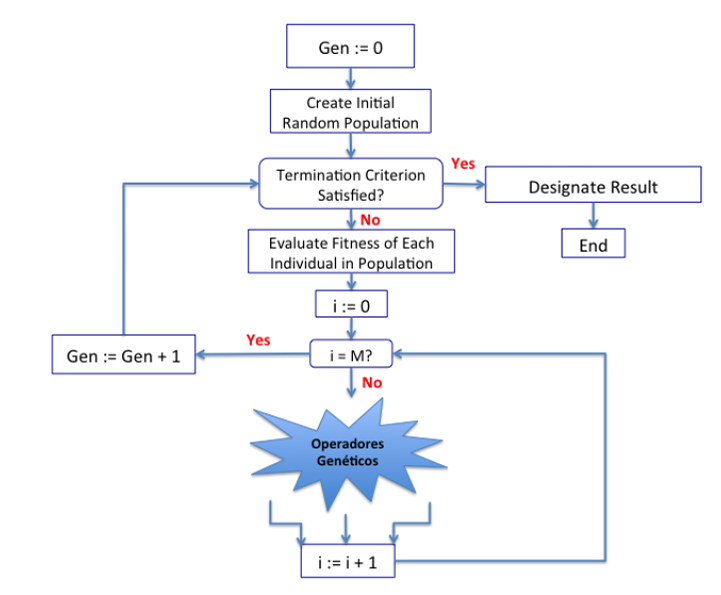